In [ ]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.1/18.1 MB 27.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.7/318.7 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.0/94.0 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 22.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.4/71.4 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 6.5 MB/s eta 0:00:00
  Attempting uninstall: tomlkit
    Found existing ins

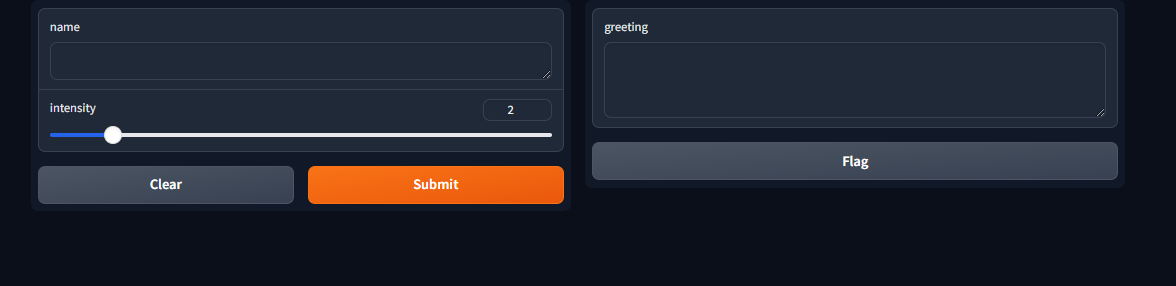

In [ ]:
import gradio as gr

def greet(name, intensity):
    return "Hello, " + name + "!" * intensity

demo = gr.Interface(
    fn=greet,
    inputs=["text", gr.Slider(value=2, minimum=1, maximum=10, step=1)],
    outputs=[gr.Textbox(label="greeting", lines=3)],
)

if __name__ == "__main__":
    demo.launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://90ad165c7c7cbc4684.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


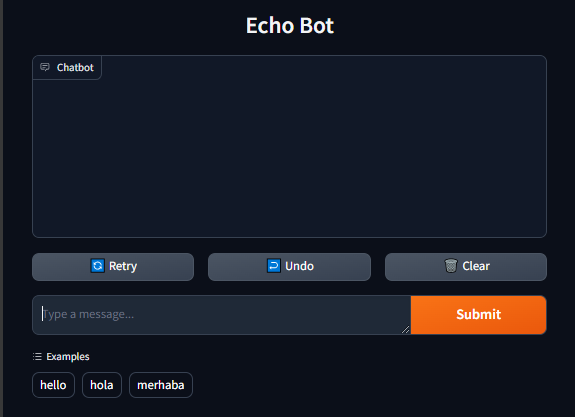

In [ ]:
import gradio as gr

def echo(message, history):
    return message

demo = gr.ChatInterface(fn=echo, examples=["hello", "hola", "merhaba"], title="Echo Bot")
demo.launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://6553107139444e8a9e.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


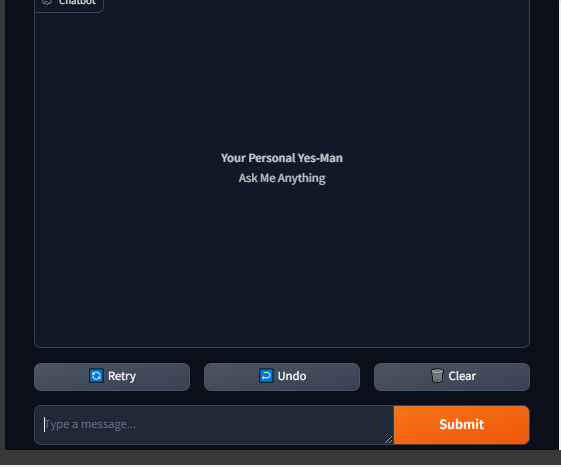

In [ ]:
import gradio as gr

def yes(message, history):
    return "yes"

def vote(data: gr.LikeData):
    if data.liked:
        print("You upvoted this response: " + data.value["value"])
    else:
        print("You downvoted this response: " + data.value["value"])

with gr.Blocks() as demo:
    chatbot = gr.Chatbot(placeholder="<strong>Your Personal Yes-Man</strong><br>Ask Me Anything")
    chatbot.like(vote, None, None)
    gr.ChatInterface(fn=yes, chatbot=chatbot)

demo.launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://b9965be9263c493be9.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [ ]:
import gradio as gr

import random

def random_response(message, history):
    return random.choice(["Yes", "No"])

chatbot=gr.ChatInterface(random_response).launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://80c4f114d830862c97.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [ ]:
import random
import gradio as gr

def alternatingly_agree(message, history):
    if len(history) % 2 == 0:
        return f"Yes, I do think that '{message}'"
    else:
        return "I don't think so"

gr.ChatInterface(alternatingly_agree).launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://b88f6007fb27ddb4d4.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In your chat function, you can use yield to generate a sequence of partial responses, each replacing the previous ones. This way, you'll end up with a streaming chatbot. It's that simple!

In [ ]:
import time
import gradio as gr

def slow_echo(message, history):
    for i in range(len(message)):
        time.sleep(0.3)
        yield "You typed: " + message[: i+1]

gr.ChatInterface(slow_echo).launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://2a2cbaa605da1f58e7.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


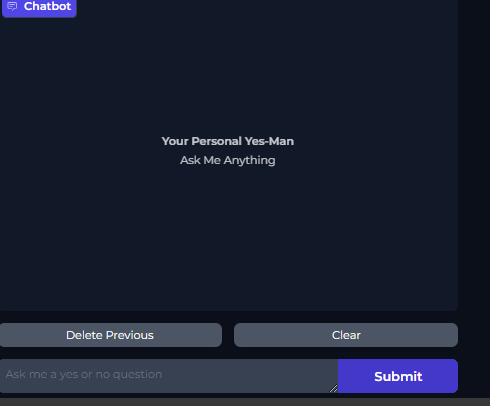

In [ ]:
import gradio as gr

def yes_man(message, history):
    if message.endswith("?"):
        return "Yes"
    else:
        return "Ask me anything!"

gr.ChatInterface(
    yes_man,
    chatbot=gr.Chatbot(placeholder="<strong>Your Personal Yes-Man</strong><br>Ask Me Anything"),
    textbox=gr.Textbox(placeholder="Ask me a yes or no question", container=False, scale=7),
    title="Yes Man",
    description="Ask Yes Man any question",
    theme="soft",
    examples=["Hello", "Am I cool?", "Are tomatoes vegetables?"],
    cache_examples=True,
    retry_btn=None,
    undo_btn="Delete Previous",
    clear_btn="Clear",
).launch()

Caching examples at: '/content/gradio_cached_examples/113'
Caching example 1/3
Caching example 2/3
Caching example 3/3
Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://221c8be90ee641b372.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


When multimodal=True, the signature of fn changes slightly. The first parameter of your function should accept a dictionary consisting of the submitted text and uploaded files that looks like this: {"text": "user input", "file": ["file_path1", "file_path2", ...]}. Similarly, any examples you provide should be in a dictionary of this form. Your function should still return a single str message.


Tip:
 If you'd like to customize the UI/UX of the textbox for your multimodal chatbot, you should pass in an instance of `gr.MultimodalTextbox` to the `textbox` argument of `ChatInterface` instead of an instance of `gr.Textbox

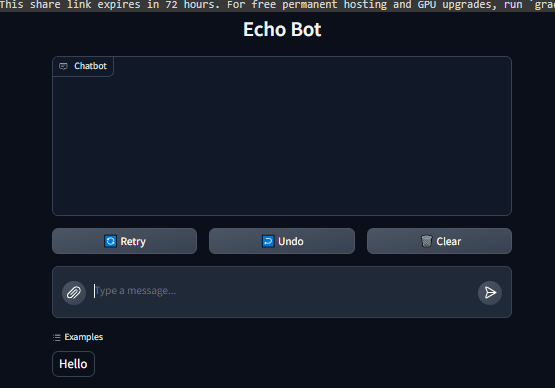

In [ ]:
import gradio as gr
import time

def count_files(message, history):
    num_files = len(message["files"])
    return f"You uploaded {num_files} files"

demo = gr.ChatInterface(fn=count_files, examples=[{"text": "Hello", "files": []}], title="Echo Bot", multimodal=True)

demo.launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://fee0fcf9c08eafe308.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


![image.png](/)

In [ ]:
import gradio as gr
import time

def echo(message, history, system_prompt, tokens):
    response = f"System prompt: {system_prompt}\n Message: {message}."
    for i in range(min(len(response), int(tokens))):
        time.sleep(0.05)
        yield response[: i+1]

with gr.Blocks() as demo:
    system_prompt = gr.Textbox("You are helpful AI.", label="System Prompt")
    slider = gr.Slider(10, 100, render=False)

    gr.ChatInterface(
        echo, additional_inputs=[system_prompt, slider]
    )

demo.launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://ad87091107ad1bb573.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


Using Gradio Components inside the Chatbot
The Chatbot component supports using many of the core Gradio components (such as gr.Image, gr.Plot, gr.Audio, and gr.HTML) inside of the chatbot. Simply return one of these components from your function to use it with gr.ChatInterface. Here's an example

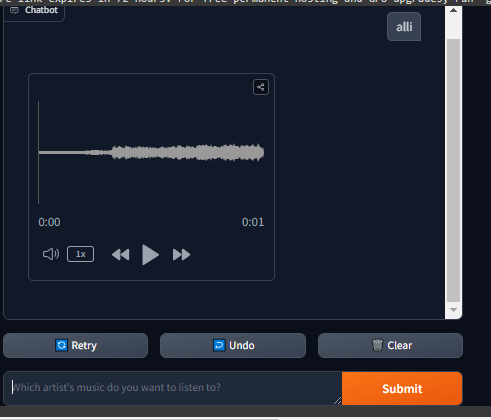

In [ ]:
import gradio as gr

def fake(message, history):
    if message.strip():
        return gr.Audio("https://github.com/gradio-app/gradio/raw/main/test/test_files/audio_sample.wav")
    else:
        return "Please provide the name of an artist"

gr.ChatInterface(
    fake,
    textbox=gr.Textbox(placeholder="Which artist's music do you want to listen to?", scale=7),
    chatbot=gr.Chatbot(placeholder="Play music by any artist!"),
).launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://405747fb1a67f82e09.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [ ]:
import gradio as gr
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer, StoppingCriteria, StoppingCriteriaList, TextIteratorStreamer
from threading import Thread

tokenizer = AutoTokenizer.from_pretrained("togethercomputer/RedPajama-INCITE-Chat-3B-v1")
model = AutoModelForCausalLM.from_pretrained("togethercomputer/RedPajama-INCITE-Chat-3B-v1", torch_dtype=torch.float16)
# model = model.to('cuda:0')

class StopOnTokens(StoppingCriteria):
    def __call__(self, input_ids: torch.LongTensor, scores: torch.FloatTensor, **kwargs) -> bool:
        stop_ids = [29, 0]
        for stop_id in stop_ids:
            if input_ids[0][-1] == stop_id:
                return True
        return False

def predict(message, history):
    history_transformer_format = history + [[message, ""]]
    stop = StopOnTokens()

    messages = "".join(["".join(["\n<human>:"+item[0], "\n<bot>:"+item[1]])
                for item in history_transformer_format])

    model_inputs = tokenizer([messages], return_tensors="pt").to("cuda")
    streamer = TextIteratorStreamer(tokenizer, timeout=10., skip_prompt=True, skip_special_tokens=True)
    generate_kwargs = dict(
        model_inputs,
        streamer=streamer,
        max_new_tokens=1024,
        do_sample=True,
        top_p=0.95,
        top_k=1000,
        temperature=1.0,
        num_beams=1,
        stopping_criteria=StoppingCriteriaList([stop])
        )
    t = Thread(target=model.generate, kwargs=generate_kwargs)
    t.start()

    partial_message = ""
    for new_token in streamer:
        if new_token != '<':
            partial_message += new_token
            yield partial_message

gr.ChatInterface(predict).launch(debug=True)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/237 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/99.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/630 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/5.69G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/111 [00:00<?, ?B/s]

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://47b17d327b27e1af7a.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://90ad165c7c7cbc4684.gradio.live
Killing tunnel 127.0.0.1:7861 <> https://6553107139444e8a9e.gradio.live
Killing tunnel 127.0.0.1:7862 <> https://b9965be9263c493be9.gradio.live
Killing tunnel 127.0.0.1:7863 <> https://80c4f114d830862c97.gradio.live
Killing tunnel 127.0.0.1:7864 <> https://b88f6007fb27ddb4d4.gradio.live
Killing tunnel 127.0.0.1:7865 <> https://2a2cbaa605da1f58e7.gradio.live
Killing tunnel 127.0.0.1:7866 <> https://221c8be90ee641b372.gradio.live
Killing tunnel 127.0.0.1:7867 <> https://fee0fcf9c08eafe308.gradio.live
Killing tunnel 127.0.0.1:7868 <> https://ad87091107ad1bb573.gradio.live
Killing tunnel 127.0.0.1:7869 <> https://405747fb1a67f82e09.gradio.live
Killing tunnel 127.0.0.1:7870 <> https://47b17d327b27e1af7a.gradio.live


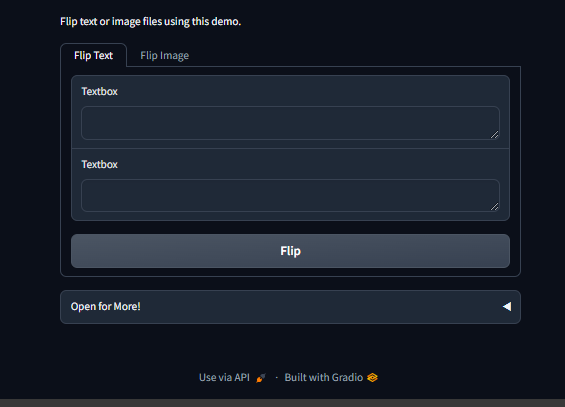

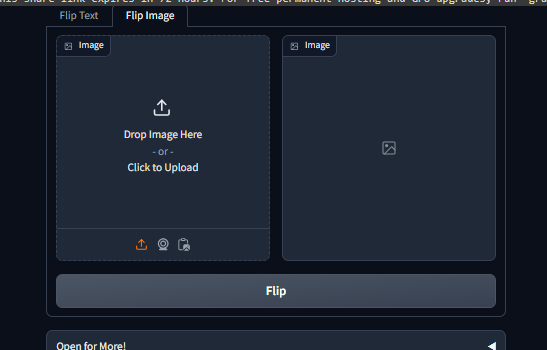

In [ ]:
import numpy as np
import gradio as gr

def flip_text(x):
    return x[::-1]

def flip_image(x):
    return np.fliplr(x)

with gr.Blocks() as demo:
    gr.Markdown("Flip text or image files using this demo.")
    with gr.Tab("Flip Text"):
        text_input = gr.Textbox()
        text_output = gr.Textbox()
        text_button = gr.Button("Flip")
    with gr.Tab("Flip Image"):
        with gr.Row():
            image_input = gr.Image()
            image_output = gr.Image()
        image_button = gr.Button("Flip")

    with gr.Accordion("Open for More!", open=False):
        gr.Markdown("Look at me...")
        temp_slider = gr.Slider(
            0, 1,
            value=0.1,
            step=0.1,
            interactive=True,
            label="Slide me",
        )

    text_button.click(flip_text, inputs=text_input, outputs=text_output)
    image_button.click(flip_image, inputs=image_input, outputs=image_output)

if __name__ == "__main__":
    demo.launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://e83993cbffe6be0453.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [ ]:
import gradio as gr

def chatbot_response(message, history, system_prompt, slider):
    # Simple echo response
    return f"You said: {message}"

with gr.Blocks() as demo:
    # Define additional inputs
    system_prompt = gr.Textbox("You are a helpful AI.", label="System Prompt")
    slider = gr.Slider(1, 10, label="Response Length")

    # Create the Chat Interface
    chat_interface = gr.ChatInterface(
        fn=chatbot_response,
        additional_inputs=[system_prompt, slider],
        title="Chatbot Demo",
        description="This is a simple chatbot interface.",
        # examples parameter is now a nested list of lists.
        # Each sublist corresponds to the inputs of the ChatInterface
        examples=[["Hello", "You are a helpful AI.", 5], ["How are you?", "You are a helpful and friendly AI.", 8], ["Tell me a joke.", "You are a funny AI.", 10]],
        theme="compact"
    )

# Launch the interface
demo.launch()

/usr/local/lib/python3.10/dist-packages/gradio/blocks.py:982: UserWarning: Cannot load compact. Caught Exception: 404 Client Error: Not Found for url: https://huggingface.co/api/spaces/compact (Request ID: Root=1-66e27513-0b088ada1bf96e78687aafa0;e7b111dd-148b-40de-a663-fe345d5dcb02)

Sorry, we can't find the page you are looking for.
  warnings.warn(f"Cannot load {theme}. Caught Exception: {str(e)}")


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://e60f346ff07ed1fe02.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


### chatbot recieves two inputs as parameter. The input text and history are directly passed with no need to pass them explicitly.

In [ ]:
import gradio as gr

def chatbot(input_text, history):
    # Example logic for chatbot response
    return f"You said: {input_text}"

chat_interface = gr.ChatInterface(fn=chatbot, title="Simple Chatbot")
chat_interface.launch()


In [ ]:
import gradio as gr

# Predefined variable
bot_name = "EchoBot"

# Function that accepts both user input and a predefined variable
def chatbot(input_text, bot_name):
    return f"{bot_name}: You said '{input_text}'"

# Use lambda or a wrapper to pass the additional variable
chat_interface = gr.ChatInterface(fn=lambda input_text: chatbot(input_text, bot_name), title="Simple Chatbot")

chat_interface.launch()
